### 리지 회귀

In [1]:
## 리지도 회귀를 위한 선형 모델이므로 최소 적합에서 사용한 것과 같은 예측 함수를 사용한다.
## 회귀에서의 가중치 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목족도 있음.
## 가중치의 절대값을 가능한 한 작게 만드는 것
## 규제: 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미-리지 회귀에 사용되는 규제방식:L2

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn
import warnings
warnings.filterwarnings('ignore')

X,y =mglearn.datasets.load_extended_boston()

X_train, X_test,y_train, y_test=train_test_split(X,y, random_state=0)
lr=LinearRegression().fit(X_train, y_train)

In [9]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X_test, y_test)))


훈련 세트 점수:0.89
테스트 세트 점수:0.75


In [10]:
ridge10=Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수:0.79
테스트 세트 점수:0.64


In [11]:
ridge01=Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(ridge01.score(X_train,y_train)))
print("데이터 세트 점수:{:.2f}".format(ridge01.score(X_test,y_test)))

훈련 세트 점수:0.93
데이터 세트 점수:0.77


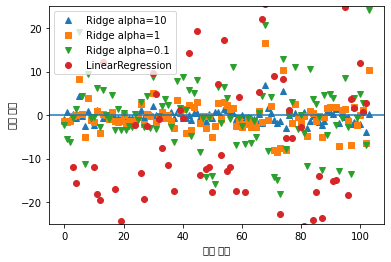

In [13]:
from matplotlib import pyplot as plt

plt.plot(ridge10.coef_,'^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")


plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

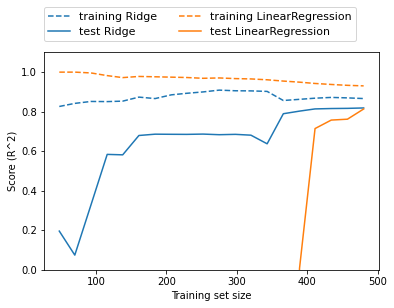

In [14]:
## 학습 곡선
mglearn.plots.plot_ridge_n_samples()

### 라소

In [16]:
## 선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있음.
## 리지 회귀에서와 같이 라소도 계수를 0에 가깝게 만드려고 함
## L1 규제

In [19]:
from sklearn.linear_model import Lasso
import numpy as np

lasso=Lasso().fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format((lasso.score(X_train, y_train))))
print("테스트 세트 점수:{:.2f}".format((lasso.score(X_test, y_test))))
print("사용한 특성의 개수:", np.sum(lasso.coef_ !=0))

훈련 세트 점수:0.29
테스트 세트 점수:0.21
사용한 특성의 개수: 4


In [20]:
## 과소 적합을 줄이기 위해서 alpha 값을 줄여본다.
## 이를 위해 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 합니다.

In [22]:
# max_iter 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생합니다.
lasso001=Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(lasso001.score(X_train,y_train)))
print("데이터 세트 점수:{:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ !=0))

훈련 세트 점수:0.90
데이터 세트 점수:0.77
사용한 특성의 개수: 33


In [23]:
lasso00001=Lasso(alpha=0.0001, max_iter=50000).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso00001.score(X_train,y_train)))
print("데이터 세트 점수:{:.2f}".format(lasso00001.score(X_test,y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ !=0))

훈련 세트 점수:0.95
데이터 세트 점수:0.64
사용한 특성의 개수: 96


Text(0, 0.5, '계수 크기')

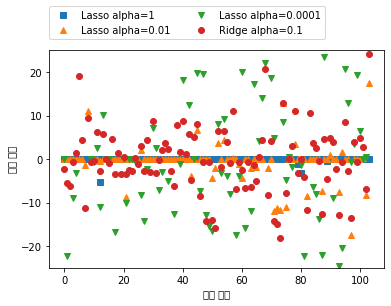

In [24]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label= "Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")